In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_matrix(vector, N_processors, title, ax):
    vector = np.repeat(vector.T, N_processors, axis=1)
    sns.heatmap(vector, xticklabels=False, yticklabels=False, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False, linewidths=2, ax=ax)
    ax.set_title(title)

def generate_random_vector(N_processors: float, M_tasks: int, T_min: int, T_max: int) -> np.array:
    task_vector = np.random.randint(T_min, T_max, (1, M_tasks))
    return task_vector

def create_manual_vector(M_tasks: float, N_processors: int, T_min: int, T_max: int) -> np.array:
    pass

def get_user_input(N_processors=None, M_tasks=None, T_min=None, T_max=None):
    if(all(not arg for arg in (N_processors, M_tasks, T_min, T_max))):
        N_processors, M_tasks = [int(i) for i in input("Введите количество процессоров и количество задач через пробел: ").split(" ")]
        if ("Нажмите Enter для автоматической генерации или введите 1 для ручного ввода") == "1":
            return create_manual_vector(M_tasks, N_processors), N_processors
        else:
            T_min, T_max = [int(i) for i in input ("Введите через пробел минимальное и максимальное значения для автогенерации: ").split(" ")]
            return generate_random_vector(N_processors, M_tasks, T_min, T_max), N_processors
    else:
        return generate_random_vector(N_processors, M_tasks, T_min, T_max), N_processors
        

In [4]:
vector, N_processors = get_user_input()
vector_asc = np.sort(vector)
vector_desc = np.flip(vector_asc)
print(f"Исходный вектор: {vector}, По возрастанию: {vector_asc}, По убыванию: {vector_desc}")

Исходный вектор: [[10 10  8 11  8  9 10  8]], По возрастанию: [[ 8  8  8  9 10 10 10 11]], По убыванию: [[11 10 10 10  9  8  8  8]]


В порядке убывания, в случайном порядке Крит.путь / В порядке убывания Половин.деление

In [5]:
print(vector_desc)

[[11 10 10 10  9  8  8  8]]


По убыванию метод половинного деления

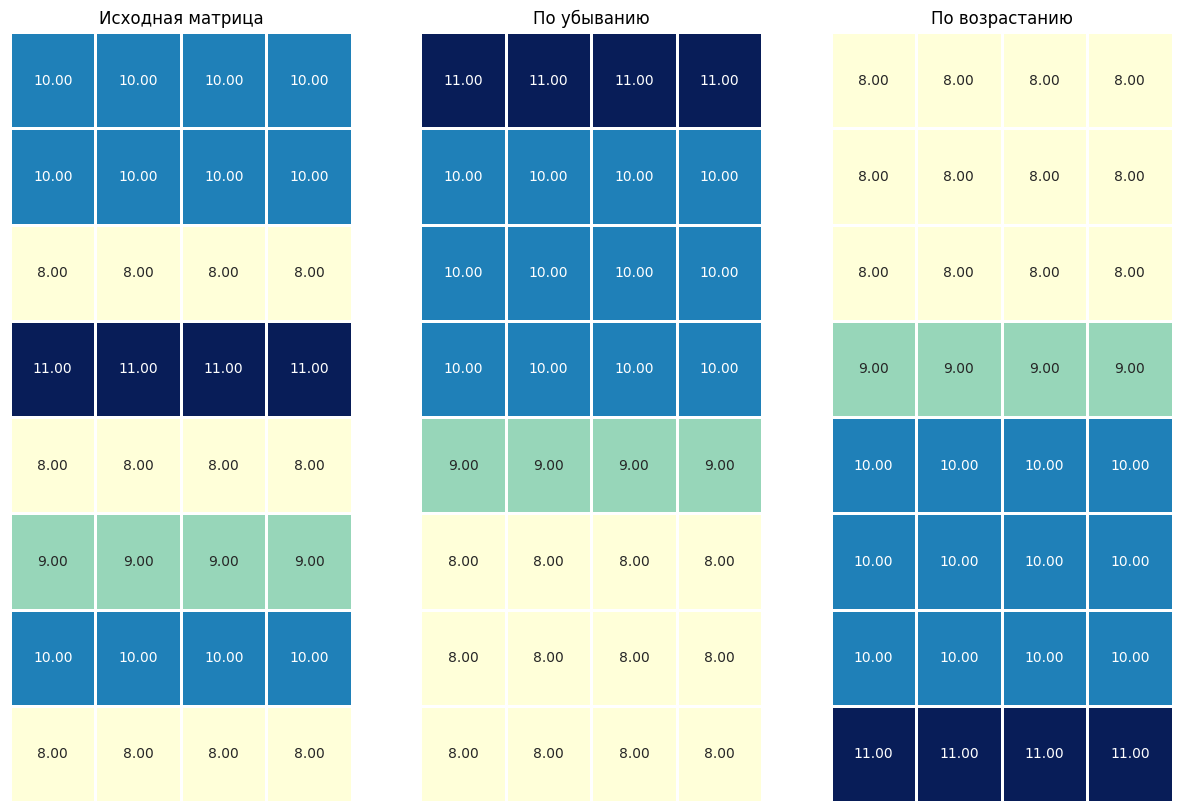

In [6]:
fig, ax = plt.subplots(1, 3, figsize = (15, 10))
plot_matrix(vector, N_processors, "Исходная матрица", ax[0])
plot_matrix(vector_asc, N_processors,  "По возрастанию", ax[2])
plot_matrix(vector_desc, N_processors, "По убыванию", ax[1])

In [7]:
def find_critical_way(vector, N_processors):
    processor_vector = [0] * N_processors
    processor_story_vector = [[] for _ in range(N_processors)]
    task_vector = vector[0]
    
    for current_task in task_vector:
        current_processor = np.argmin(processor_vector)
        processor_story_vector[current_processor].append(current_task)
        processor_vector[current_processor] += current_task
    
    print(f"Загруженные процессоры: {processor_vector}")
    print(f"История загрузки процессоров: {processor_story_vector}")
    return (processor_vector), (processor_story_vector)

        
def half_division_multitude_tasks(vector, N_processors):
    if (N_processors % 2 != 0):
        print("Число процессоров нечётно! Данный метод не работает.")
        return None
    
    vector = np.flip(np.sort(vector))
    print("Входной вектор: ", vector)
    f_lvl_processors, processors_story_vector = find_critical_way(vector, 2)
    results = {}

    print('Processors_story_vector: ', processors_story_vector)
    results["left"] = (find_critical_way(np.array([processors_story_vector[0]]), N_processors // 2))
    results["right"] = (find_critical_way(np.array([processors_story_vector[1]]), N_processors // 2))

    print(f"Максимальное время в левой части: {np.max(results['left'][0])}\nМаксимальное время в правой части: {np.max(results['right'][0])}")
    
    print(f"Левая часть: {results.values()}")
    print(f"Правая часть: {results.values()}")
    
    return results
    
    

In [8]:
processor_vector, processor_story_vector = find_critical_way(vector, N_processors)
print(f"Максимальное значение загруженности процессора. Случайно: {max(processor_vector)}")
print(processor_story_vector)
processor_vector, processor_story_vector = find_critical_way(vector_asc, N_processors)
print(f"Максимальное значение загруженности процессора. По возрастанию: {max(processor_vector)}")
print(processor_story_vector)
processor_vector, processor_story_vector = find_critical_way(vector_desc, N_processors)
print(f"Максимальное значение загруженности процессора. По убыванию: {max(processor_vector)}")
print(processor_story_vector)

Загруженные процессоры: [19, 20, 16, 19]
История загрузки процессоров: [[10, 9], [10, 10], [8, 8], [11, 8]]
Максимальное значение загруженности процессора. Случайно: 20
[[10, 9], [10, 10], [8, 8], [11, 8]]
Загруженные процессоры: [18, 18, 18, 20]
История загрузки процессоров: [[8, 10], [8, 10], [8, 10], [9, 11]]
Максимальное значение загруженности процессора. По возрастанию: 20
[[8, 10], [8, 10], [8, 10], [9, 11]]
Загруженные процессоры: [19, 19, 18, 18]
История загрузки процессоров: [[11, 8], [10, 9], [10, 8], [10, 8]]
Максимальное значение загруженности процессора. По убыванию: 19
[[11, 8], [10, 9], [10, 8], [10, 8]]


In [16]:
half_division_multitude_tasks(vector_desc, N_processors)

Входной вектор:  [[21 21 19 17 17 17 16 16 16 15 15 13 11]]
Загруженные процессоры: [112, 102]
История загрузки процессоров: [[21, 19, 17, 16, 15, 13, 11], [21, 17, 17, 16, 16, 15]]
Processors_story_vector:  [[21, 19, 17, 16, 15, 13, 11], [21, 17, 17, 16, 16, 15]]
Загруженные процессоры: [61, 51]
История загрузки процессоров: [[21, 16, 13, 11], [19, 17, 15]]
Загруженные процессоры: [52, 50]
История загрузки процессоров: [[21, 16, 15], [17, 17, 16]]
Максимальное время в левой части: 61
Максимальное время в правой части: 52
Левая часть: dict_values([([61, 51], [[21, 16, 13, 11], [19, 17, 15]]), ([52, 50], [[21, 16, 15], [17, 17, 16]])])
Правая часть: dict_values([([61, 51], [[21, 16, 13, 11], [19, 17, 15]]), ([52, 50], [[21, 16, 15], [17, 17, 16]])])


{'left': ([61, 51], [[21, 16, 13, 11], [19, 17, 15]]),
 'right': ([52, 50], [[21, 16, 15], [17, 17, 16]])}